# Data and Sampling Distribution

Note: In general Data Scientist need not worry about the theoretical nature of a population and instead should focus on the sampling procedures and the data at hand. There are some notable exceptions: data that is generated from physical processes can be modeled. For example a coin flip: this follows a binomial distribution. Any real-life binomial situation(buy or don't buy, fraud or no fraud, click or don't click) can be modeled effectively by a coin(with modified probability of landing heads).

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path
from scipy import stats
from sklearn.utils import resample
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

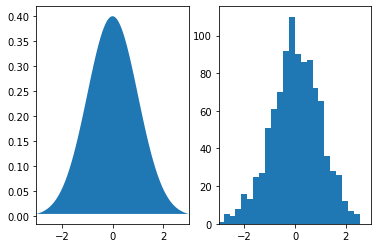

In [82]:
np.random.seed(seed=1)
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

fig, axes = plt.subplots(ncols=2)

ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_xlim(-3, 3)

ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_xlim(-3, 3)
ax.set_position

plt.show()

## Random Sampling and Sample Bias

Important key terms: 
- **Random and stratisfied sampling**
- **Population**
- **Bias**
- **Sample bias**

Data quality is often greater than data quantity when making estimates or model based on a sample. In data science this means **completeness, consistency of format, cleaniness, and accuracy of data points**. Statistics add the notion of **representativeness**. Classic example: Literary Digest poll of 1963 that predicted a victory of Alf Landon over Franklin Roosevelt: they polled the subscribers plus additional lists of people, totaling 10 million people. George Gallup biweekly polls of just 2000 people and accuratly predicted a Roosevelt victory. 

A classic scenario when size matter is when the data is not only big but sparse as well. For example search queries recieved by Google. There are over 150,000 words and Google processes trillions of queries a day, leading to a matrices mostly made of zeros.

## Selection Bias

Important key terms: 
- **Selection bias**(cherry picking, time intervals, stopping experiments, regression to the mean)
- **Data snooping** (tossing coin 10 times vs. 20 people tossing coin 10 times)
- **Vast search effect**

In data science, selection bias is something to worry about when you repeatly review a large data set. Using a holdout set or more than one to validate performance.

## Sampling Distribution of a Statistic
Important key terms: 
- **Sample statistic**
- **Data and sample distribution**
- **Central limit theorem**
- **Standard error**(variability of a sample statistic over many statitics)

Note: The distribution of a sample statistic such as the mean is likely to be more regular and bell shaped than the distribution of the data itself.

In [83]:
LOANS_INCOME = DATA / 'loans_income.csv'

### Plotting histogram of annual income of loan applicants, mean of 5 applicants, mean of 20 applicants

In [90]:
loans = pd.read_csv(LOANS_INCOME).squeeze('columns')
loans.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [92]:
sample_loans = pd.DataFrame({
    'income': loans.sample(1000),
    'type': 'Data',
})
sample_loans_5 = pd.DataFrame({
    'income': [loans.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})
sample_loans_20 = pd.DataFrame({
    'income': [loans.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_loans, sample_loans_5, sample_loans_20])
results.head()

,income,type
22982,52500.0,Data
23099,57000.0,Data
37413,92000.0,Data
37553,68139.0,Data
26715,38000.0,Data


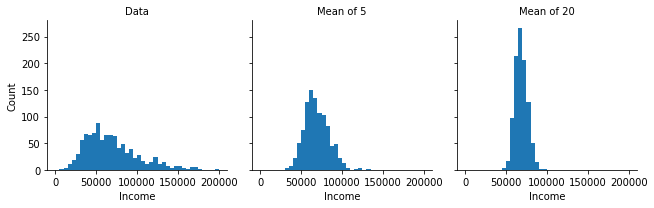

In [93]:
g = sns.FacetGrid(results, col='type')
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.show()

Note that frequency distributions of a sample statistic tells us how that metric would turn out differently from sample to sample and can be estimated via the boostrap, or via formulas that rely on the central limit theorem. A key metric that sums up the variability of a sample statistic is its standard error.

## The Bootstrap
Important key terms: 
- **Bootstrap sample**
- **Resampling**

The algorithm for a bootstrap resampling of the mean, for sample size n we have
1. Draw a sample value, record it, and then replace it.
2. Repeat n times
3. Record the mean of the n resampled values
4. Repeat 1-3 R times(R the number of iterations)
5. Use the R results to:
    - Calculate their standard deviation(which estimates sample mean standard error)
    - Produce a histogram or boxplot
    - Find a confidence interval


In [95]:
results = []
for iteration in range(1000):
    sample = resample(loans)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print('original: {}'.format(loans.median()))
print('bias: {}'.format(results.mean()-loans.median()))
print('std. err: {}'.format(results.std()))

Bootstrap Statistics:
original: 62000.0
bias: -81.66000000000349
std. err: 228.88132199801618


The original estimate of the median is $62000. The bootstrap distribution indicates that the estimate has a bias of about -$80 and a standard error of $220. The results will vary slightly between consecutive runs of the algorithm.

Note: we can run boostrapping on multivariate data. A model might then be run on the bootstrapped data, for example, to estimate the stability(vaiability) of model parameters, or to improve predictive power. With classification and regression trees, running multiple trees on bootstrap samples and then averaging their predictions or with classification, taking the majority vote, generally performs better than using a single tree. This process is called bagging.

## Confidence Intervals
Important key terms: 
- **Confidence level**
- **Interval endpoints**

A x% confidence interval around a sample estimate should, on average, contian similar sample estimates x% of the time( when similar sampling procedur is followed). Given a sample size n, and a sample statistic of intrest, the algorithm for a bootstrap confidence interval is as follows:
1. Draw a random sample of size n with replacement from the data(a resample)
2. Record the statistic of interest for the resample
3. Repeat steps 1-2 many(R) times
4. For an x% confidence interval, trim $[(100-x)/2]$% of the R resample results from either end of the distribution
5. The trim points are the endpoints of an x% bootstrap confidence interval.

The bootstrap is a general tool that can be used to generate confidence intervals for most statistics, or model parameters. For a Data Scientist the confidence interval is a tool that can be used to get an idea of how variable a sample result might be, most likely to communicate the potential error in an estimate, and perhaps to learn whether a larger sample is needed.

## Normal Distribution
Important key terms:
- **Error**
- **Standardize**
- **z-score**
- **Standard normal**
- **QQ-plot**

Recall the 68,95,99 rule.